# DSCI 100 Project - Section 6 Group 16 
# Minecraft project report 
## members:

|Name|Student Number|
|--------|---------|
|Clement Cheung|40162752|
|Eileen Limneus|81033300|
|Min Hyung Yoo|26944660|
|Tyler Lee|12253688|


### Project Objectives!
+ **Broad Question:** (1) What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

+ **Specific Question:** How does a player's tendency to revisit the PLAICraft server, and their total playtime affect their subscription status to a game-related newsletter?

In [1]:
# loading the 

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

+ relevant background information on the topic enough so that somoneone that is unfamiliar on it can understand the full report.
+ clearly state the question you tried to answer with your project
+ identify and fully describe the dataset that was used to answer the question

## Methods & Results

* describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
* your report should include code which:
    - loads data 
    - wrangles and cleans the data to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis
 
note: all figures should have a figure number and a legend

#### reading the data

In [2]:
session_data <- read_csv("sessions.csv")
players_data <- read_csv("players.csv")
session_data
players_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


#### processing session_data and merging the two dataframes

In [3]:
session_data <- session_data |> 
group_by(hashedEmail) |>
summarise(count = n()) |>
arrange(-count)
session_data

hashedEmail,count
<chr>,<int>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159
⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


In [4]:
final_data <- full_join(session_data, players_data, by = "hashedEmail")
final_data

hashedEmail,count,experience,subscribe,played_hours,name,gender,Age
<chr>,<int>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,Amateur,TRUE,56.1,Dana,Male,23
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,219,Regular,TRUE,223.1,Hiroshi,Male,17
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,159,Amateur,TRUE,150.0,Delara,Female,16
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
514ebbaa30f0d162127e065ab780892b7930cf8d75944d5eb09c91c02d6026c7,NA,Amateur,FALSE,0,Orion,Male,17
644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,NA,Amateur,TRUE,0,Rhys,Male,20
b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,NA,Amateur,TRUE,0,Bailey,Female,17


#### simple visualisation to get started

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


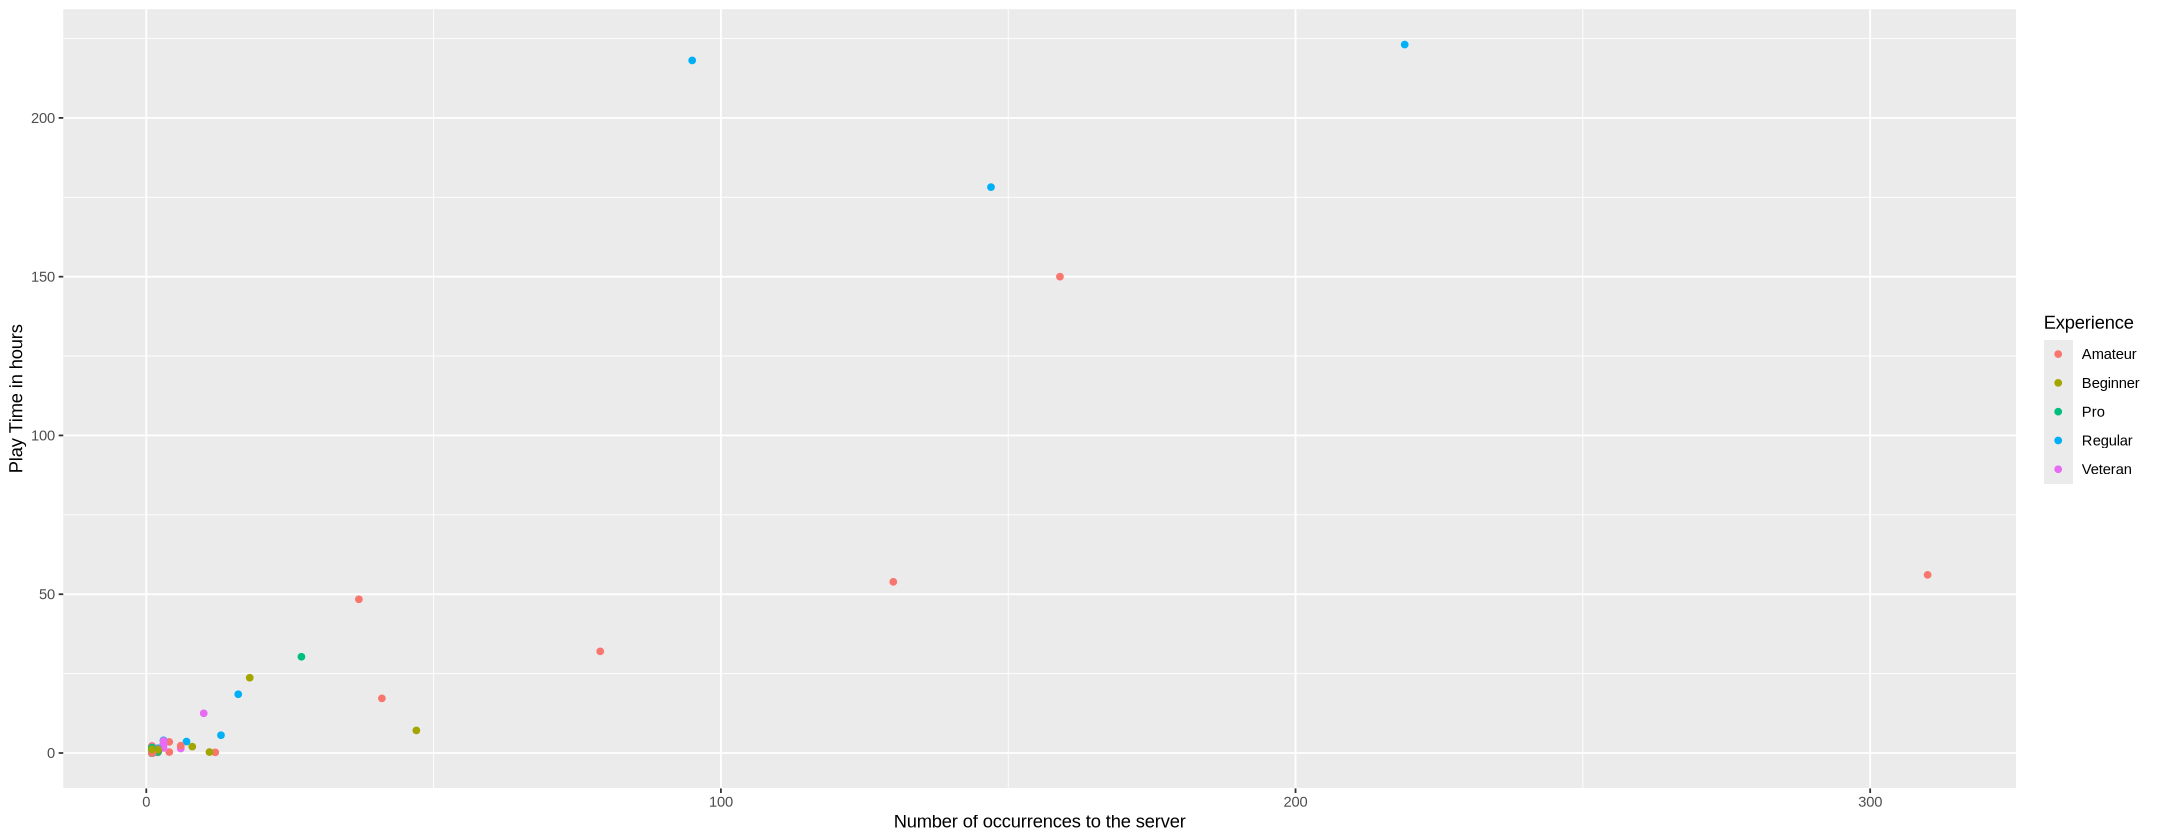

In [5]:
options(repr.plot.width = 18, repr.plot.height = 7)
final_data |>  
    ggplot(aes(x = count, y = played_hours, color = experience)) + 
   geom_point() + 
  xlab("Number of occurrences to the server") +
  ylab("Play Time in hours") +
  labs(color = "Experience")

# talk about limiting x values, or separating the people with - say, 50+ sessions - into a separate plot.

## Discussion

* summary of findings
* discuss if results were expected
* impact of the findings
* further questions to ask

## References

* any format so long as its a consistent citation style